# **ANÁLISE E PREDIÇÃO COM PYTHON E PANDAS**
<br>
Este projeto trata-se de uma análise de imóveis disponíveis para locação na cidade de São Paulo. Nesta pesquisa foi utilizada uma base de dados que apresenta algumas informações como o tipo de imóvel e suas caracaterísticas, bem como a localização e os valores do aluguel.
</br>
<br>
Equipe de desenvolvimento: Carolyne Oliveira, Marcel Hikaru Yamanaka, Layanne Mary
</br>

##**<font color = red>Obter base de dados:**

Download da base de dados e bibliotecas ultilizadas.

In [ ]:
# Importando Bibliotecas

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
from scipy.stats import pearsonr, linregress
from scipy.stats import ttest_ind

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/Hikaruyamanaka/Projeto_Analise_de_Dados_E_Predicao/main/base-alugueis-sp.csv'

# Ler o arquivo CSV diretamente do GitHub
df = pd.read_csv(url)

##**<font color = red>Importação e Limpeza:**

Importação, limpeza e tratamento dos dados.

In [ ]:
# Visualizando as colunas existentes
colunas = list(df.columns)
colunas

['address', 'district', 'area', 'bedrooms', 'garage', 'type', 'rent', 'total']

In [ ]:
# Verificando o Tamanho do nosso DataFrame
df.shape

(11657, 8)


<br>

Nas colunas existentes tem-se o endereço, bairro, área do imóvel, quantidade
de quartos, garagem, o tipo do imóvel, o valor do aluguel e o total. As informações contidas nestas células de colunas se apresentam em inglês, e para melhor entendimento, estes termos foram traduzidos para o português.

</br>



In [ ]:
# Renomeando nomes das colunas
df.rename(columns = {'address':'Endereço',
                     'district':'Bairro',
                     'area':'Area',
                     'bedrooms':'Quartos',
                     'garage':'Garagem',
                     'type':'Tipo_do_Imovel',
                     'rent':'Aluguel',
                     'total':'Total'},
                     inplace = True)

 Incialmente foi feita a visualização dos primeiros registros com a finalidade de se obter de forma resumida as informações do arquivo. Com isso, foi possível observar o tipo de dado, os valores máximos e mínimos, a média, a quantidade total de imóveis referente a cada tipo.

In [ ]:
# Visualizando os 5 primeiros registros
print(df.head())
print(df.info())

             Endereço        Bairro  Area  Quartos  Garagem  \
0          Rua Herval    Belenzinho    21        1        0   
1  Avenida São Miguel  Vila Marieta    15        1        1   
2    Rua Oscar Freire     Pinheiros    18        1        0   
3    Rua Júlio Sayago       Vila Ré    56        2        2   
4  Rua Barata Ribeiro    Bela Vista    19        1        0   

       Tipo_do_Imovel  Aluguel  Total  
0     Studio e kitnet     2400   2939  
1     Studio e kitnet     1030   1345  
2         Apartamento     4000   4661  
3  Casa em condomínio     1750   1954  
4     Studio e kitnet     4000   4654  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Endereço        11657 non-null  object
 1   Bairro          11657 non-null  object
 2   Area            11657 non-null  int64 
 3   Quartos         11657 non-null  int64 
 4   Gara

Em seguida, foi feita a verificação dos valores ausentes, e, como mostrado nas linhas abaixo não foram encontrados valores nulos.

In [ ]:
# Verificando se existe valores ausentes
valores_ausentes = df.isnull().sum()
print("VALORES AUSENTES ANTES DA LIMPEZA:\n", valores_ausentes)

VALORES AUSENTES ANTES DA LIMPEZA:
 Endereço          0
Bairro            0
Area              0
Quartos           0
Garagem           0
Tipo_do_Imovel    0
Aluguel           0
Total             0
dtype: int64


In [ ]:
#  Quantidade de Imóveis por tipo
print(df['Tipo_do_Imovel'].value_counts())

Tipo_do_Imovel
Apartamento           7194
Casa                  2841
Studio e kitnet       1381
Casa em condomínio     241
Name: count, dtype: int64


In [ ]:
#Verificar valores minimos na variavel Área
df['Area'].min()

0

In [ ]:
#Verificar valores médios na variavel Área
df['Area'].mean()

84.65565754482286

A vantagem da mediana, em relação à média, é que a mediana geralmente representa melhor o valor típico da amostra, pois não é distorcida por valores extremamente altos ou baixos. Portanto, nas comparações, de modo geral é melhor usar a mediana.
FONTE: [Média ou mediana?](https://www.linkedin.com/pulse/m%C3%A9dia-ou-mediana-d%C3%B3rian-bachmann-1c/)

Após pesquisas, viu-se que o menor apartamento tem 10m², por isso a decisão de substituir pela mediana todos os valores constantes na variavel Area, menor que 10m².
*FONTE:* [Menor Apartamento do País](https://exame.com/mercado-imobiliario/menor-apartamento-pais-10-metros-quadrados-preco-200-mil/)

In [ ]:
# Verificar Mediana da variavel Área
mediana_area = df['Area'].median()
print("A mediana da Area é de:", mediana_area)

# Substituir valores menores que 10 pela mediana
for i in range(10):
    df['Area'] = df['Area'].replace(i, mediana_area)
print(df)

A mediana da Area é de: 60.0
                              Endereço                   Bairro  Area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       Quartos  Garagem      Tipo_do_Imovel  Aluguel  Total  
0            1        0     Stud

In [ ]:
# Verificar valores minimos na variavel Área após substituicao pelo calculo da mediana
df['Area'].min()

10

##**<font color = red>Análise Descritiva:**

Análise descritiva dos dados, calculos estatísticos básicos e tendências.



<br>
Abaixo, tem-se as estatísticas descritivas do banco de dados.
</br>

In [ ]:
# Estatísticas descritiva da base de dados (df)
desc_stats = df.describe().round(2)
print(desc_stats)

           Area   Quartos   Garagem   Aluguel     Total
count  11657.00  11657.00  11657.00  11657.00  11657.00
mean      84.69      1.97      1.06   3250.81   4080.03
std       74.00      0.93      1.13   2650.71   3352.48
min       10.00      0.00      0.00    500.00    509.00
25%       40.00      1.00      0.00   1590.00   1996.00
50%       60.00      2.00      1.00   2415.00   3057.00
75%       96.00      3.00      2.00   3800.00   4774.00
max      580.00      6.00      6.00  25000.00  28700.00


In [ ]:
# Descrição estatística da base de dados
print('**DESCRICAO ESTATISTICAS DAS VARIAVEIS**')
print(df.describe().round(2))

**DESCRICAO ESTATISTICAS DAS VARIAVEIS**
           Area   Quartos   Garagem   Aluguel     Total
count  11657.00  11657.00  11657.00  11657.00  11657.00
mean      84.69      1.97      1.06   3250.81   4080.03
std       74.00      0.93      1.13   2650.71   3352.48
min       10.00      0.00      0.00    500.00    509.00
25%       40.00      1.00      0.00   1590.00   1996.00
50%       60.00      2.00      1.00   2415.00   3057.00
75%       96.00      3.00      2.00   3800.00   4774.00
max      580.00      6.00      6.00  25000.00  28700.00


In [ ]:
# Estatísticas descritivas por tipo de imóvel
desc_stats_tipo_imovel = df.groupby('Tipo_do_Imovel')['Total'].describe()
print(desc_stats_tipo_imovel)

                     count         mean          std    min     25%     50%  \
Tipo_do_Imovel                                                                
Apartamento         7194.0  4435.428413  3496.018200  686.0  2266.0  3293.0   
Casa                2841.0  3824.244280  3259.062002  509.0  1493.0  2843.0   
Casa em condomínio   241.0  4576.232365  4733.798269  556.0  1572.0  2712.0   
Studio e kitnet     1381.0  2668.280232  1624.083428  588.0  1512.0  2318.0   

                        75%      max  
Tipo_do_Imovel                        
Apartamento         5158.75  28700.0  
Casa                4816.00  21050.0  
Casa em condomínio  4851.00  21140.0  
Studio e kitnet     3458.00  26710.0  


In [ ]:
# Análise por tipo de imóvel
print('\n**DESCRICAO ESTATISTICAS POR TIPO DE IMOVEL**')
print(df.groupby('Tipo_do_Imovel')['Aluguel'].describe().round(2))


**DESCRICAO ESTATISTICAS POR TIPO DE IMOVEL**
                     count     mean      std    min     25%     50%      75%  \
Tipo_do_Imovel                                                                 
Apartamento         7194.0  3356.90  2638.99  567.0  1700.0  2500.0  3899.75   
Casa                2841.0  3471.92  2873.79  500.0  1380.0  2600.0  4500.00   
Casa em condomínio   241.0  3912.55  3930.91  504.0  1400.0  2200.0  4000.00   
Studio e kitnet     1381.0  2127.83  1365.74  500.0  1200.0  1850.0  2790.00   

                        max  
Tipo_do_Imovel               
Apartamento         15000.0  
Casa                15000.0  
Casa em condomínio  15000.0  
Studio e kitnet     25000.0  


In [ ]:
# Análise por quantidade de quartos
print('\n**DESCRICAO ESTATISTICAS POR QUANTIDADE DE QUARTOS**')
print(df.groupby('Quartos')['Aluguel'].describe().round(2))


**DESCRICAO ESTATISTICAS POR QUANTIDADE DE QUARTOS**
          count     mean      std     min     25%     50%      75%      max
Quartos                                                                    
0          37.0  2236.78  2471.00   850.0  1050.0  1400.0   2200.0  12500.0
1        4193.0  2153.96  1526.09   500.0  1196.0  1711.0   2700.0  25000.0
2        4347.0  2749.28  1828.05   500.0  1650.0  2200.0   3120.0  15000.0
3        2423.0  4795.24  3038.86   900.0  2720.0  3800.0   5812.0  15000.0
4         543.0  7806.27  3652.37  1890.0  4700.0  7200.0  10000.0  15000.0
5          91.0  8568.25  3496.67  2400.0  5805.0  8000.0  11760.0  15000.0
6          23.0  8346.30  3698.93  3000.0  5562.5  8000.0  10800.0  15000.0


In [ ]:
# Análise por área
print('\n**DESCRICAO ESTATISTICAS POR AREA**')
print(df.groupby('Area')['Aluguel'].describe().round(2))


**DESCRICAO ESTATISTICAS POR AREA**
      count      mean      std      min       25%      50%      75%      max
Area                                                                        
10      5.0   1221.80   433.34    699.0    840.00   1400.0   1450.0   1720.0
11      7.0   1997.86  1024.63    600.0   1380.00   2125.0   2350.0   3800.0
12      9.0   2132.00  2674.60    900.0    950.00   1070.0   1750.0   9136.0
13      2.0    850.00    70.71    800.0    825.00    850.0    875.0    900.0
14      8.0   1252.88   360.43    700.0   1018.25   1300.0   1500.0   1750.0
...     ...       ...      ...      ...       ...      ...      ...      ...
550     2.0  10500.00  6363.96   6000.0   8250.00  10500.0  12750.0  15000.0
560     3.0  11166.67  5008.33   5500.0   9250.00  13000.0  14000.0  15000.0
568     1.0  13500.00      NaN  13500.0  13500.00  13500.0  13500.0  13500.0
570     1.0  10000.00      NaN  10000.0  10000.00  10000.0  10000.0  10000.0
580     1.0  11520.00      NaN  11520.0

In [ ]:
# Análise por bairro
print('\n**DESCRICAO ESTATISTICAS POR BAIRRO**')
print(df.groupby('Bairro')['Aluguel'].describe().round(2))


**DESCRICAO ESTATISTICAS POR BAIRRO**
                                                    count      mean      std  \
Bairro                                                                         
Aclimação                                            50.0   2810.26  1750.91   
Adalgisa                                              4.0   7275.50  1663.18   
Agua Branca                                           1.0   2435.00      NaN   
Alphaville                                           24.0  11247.46  3957.89   
Alphaville Centro Industrial E Empresarial/alph...    5.0   6300.00  4538.17   
...                                                   ...       ...      ...   
Várzea da Barra Funda                                11.0   3608.91  1689.82   
Água Branca                                          44.0   3774.05  2485.37   
Água Fria                                            20.0   3721.80  3017.01   
Água Funda                                            1.0   3000.00      NaN   
Á

In [ ]:
# Quantidade dos tipos de imóveis em porcentagem
df['Tipo_do_Imovel'].value_counts(normalize=True) * 100

Tipo_do_Imovel
Apartamento           61.713992
Casa                  24.371622
Studio e kitnet       11.846959
Casa em condomínio     2.067427
Name: proportion, dtype: float64

In [ ]:
#Média de despesas totais por area
total_media_area=df.groupby('Total')['Area'].mean()
print(total_media_area)

Total
509       30.0
521       30.0
551       45.0
556       30.0
574       30.0
         ...  
24540    338.0
25510    311.0
26550    329.0
26710     24.0
28700    454.0
Name: Area, Length: 5571, dtype: float64


In [ ]:
# Média de despesas totais por tipo de imóvel
media_valores_por_tipo = df.groupby('Tipo_do_Imovel')['Total'].mean().reset_index().round(2)
print(media_valores_por_tipo)

       Tipo_do_Imovel    Total
0         Apartamento  4435.43
1                Casa  3824.24
2  Casa em condomínio  4576.23
3     Studio e kitnet  2668.28


In [ ]:
# Agrupa o DataFrame pelo aluguel e calcular a média da área
aluguel_media_area = df.groupby('Aluguel')['Area'].mean()

# Imprime a média do aluguel por area
print(aluguel_media_area)

Aluguel
500       37.857143
504       30.000000
550       31.200000
552       25.000000
566       20.000000
            ...    
14500    224.000000
14530    251.200000
14900    450.000000
15000    276.424779
25000     24.000000
Name: Area, Length: 1662, dtype: float64


In [ ]:
# Calculando a diferença entre as colunas Aluguel e Total para descobrir o valor das utilidade (Condominio, IPTU, etc)
df['Utilidades'] = df['Total'] - df['Aluguel']

print(df)

                              Endereço                   Bairro  Area  \
0                           Rua Herval               Belenzinho    21   
1                   Avenida São Miguel             Vila Marieta    15   
2                     Rua Oscar Freire                Pinheiros    18   
3                     Rua Júlio Sayago                  Vila Ré    56   
4                   Rua Barata Ribeiro               Bela Vista    19   
...                                ...                      ...   ...   
11652          Avenida Adolfo Pinheiro              Santo Amaro    94   
11653  Rua Professor Alexandre Correia     Jardim Vitória Régia   350   
11654                 Rua Abílio Borin         Jardim Caravelas    84   
11655                Rua Forte William  Jardim Fonte do Morumbi    76   
11656              Rua Alexandre Dumas              Santo Amaro   110   

       Quartos  Garagem      Tipo_do_Imovel  Aluguel  Total  Utilidades  
0            1        0     Studio e kitnet     2

In [ ]:
#Covariancia de relação entre as variaveis abaixo:
df[['Area', 'Quartos', 'Aluguel', 'Total', 'Utilidades']].cov(  ).round(2)

,Area,Quartos,Aluguel,Total,Utilidades
Area,5475.28,50.18,130889.14,161807.46,30918.32
Quartos,50.18,0.87,1311.25,1642.20,330.94
Aluguel,130889.14,1311.25,7026271.76,8691919.27,1665647.51
Total,161807.46,1642.20,8691919.27,11239123.99,2547204.71
Utilidades,30918.32,330.94,1665647.51,2547204.71,881557.20


In [ ]:
#Covariância de relação entre as variáveis abaixo:
df[['Area', 'Aluguel']].cov(  ).round(2)

,Area,Aluguel
Area,5475.28,130889.14
Aluguel,130889.14,7026271.76


Foi estabelecida a aplicação o método dummies na variável Tipo_do_Imovel para fazer a transformação de forma direta das variáveis categóricas. É possível observar que o get_dummies() é fácil de utilizar, mas é preferível para atividades de análises de dados, enquanto o OneHotEncoder() é mais recomendado para aplicar em modelos de machine learning.

In [ ]:
#Aplicando o Modelo Dummies na variável Tipo do Imovel
dfDummies = pd.get_dummies(df['Tipo_do_Imovel'])

#Converter Colunas Booleanas para Binárias:
dfDummies = dfDummies.astype(int)

#imprimir o resultado
dfDummies.head()

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,0,0,1


In [ ]:
#Unindo os resultados a nosso DataFrame anterior
df = pd.concat([df, dfDummies], axis=1)

#imprimir o resultado
print(df.head())

             Endereço        Bairro  Area  Quartos  Garagem  \
0          Rua Herval    Belenzinho    21        1        0   
1  Avenida São Miguel  Vila Marieta    15        1        1   
2    Rua Oscar Freire     Pinheiros    18        1        0   
3    Rua Júlio Sayago       Vila Ré    56        2        2   
4  Rua Barata Ribeiro    Bela Vista    19        1        0   

       Tipo_do_Imovel  Aluguel  Total  Utilidades  Apartamento  Casa  \
0     Studio e kitnet     2400   2939         539            0     0   
1     Studio e kitnet     1030   1345         315            0     0   
2         Apartamento     4000   4661         661            1     0   
3  Casa em condomínio     1750   1954         204            0     0   
4     Studio e kitnet     4000   4654         654            0     0   

   Casa em condomínio  Studio e kitnet  
0                   0                1  
1                   0                1  
2                   0                0  
3                   1   

##**<font color = red>Modelagem de Regressão Linear:**

Análise de regressão linear dos dados para tentar prever o preço do aluguel com uma determinada área.




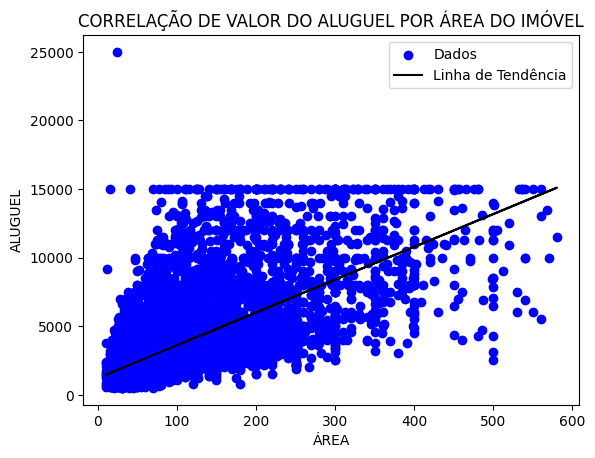

Resultado do coeficiente de correlação: 0.667325599734634
Valor p: 0.0


In [ ]:
#Regressao Linear

X,y = df['Area'], df['Aluguel']

# Scatter plot
plt.scatter(X, y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('ÁREA')
plt.ylabel('ALUGUEL')
plt.title('CORRELAÇÃO DE VALOR DO ALUGUEL POR ÁREA DO IMÓVEL')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

A correlação {r} expressa o quanto o nosso modelo conseguiu explicar os dados. O seu valor varia entre 0 (o modelo não consegue explicar a relação entre as variáveis) até 100% (o modelo conseguiu explicar o relacionamento entre as variáveis). Neste caso, tem-se 66%.

In [ ]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df[['Area']]  # Exemplo de variáveis
y = df['Aluguel']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajuste o modelo de regressão linear simples
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Mostrar quanto a linha de Regressão se ajusta aos dados
print('O coeficiente de determinacao R² é de: {:.2f}'.format(modelo.score(X_test, y_test)))

O coeficiente de determinacao R² é de: 0.44


O coeficiente de determinação R² é uma métrica importante em regressão que indica o quanto a variabilidade da variável dependente (no caso, o aluguel) é explicada pelas variáveis independentes (a área).

O coeficiente de determinação R² varia de 0 a 1.
Um valor de 0 significa que o modelo não explica nenhuma variabilidade nos dados. Um valor de 1 significa que o modelo explica toda a variabilidade nos dados.
No caso, o valor de R² é 0.44. Isso significa que aproximadamente 44% da variabilidade no aluguel pode ser explicada pela área. Em outras palavras, o modelo de regressão linear simples está capturando parte da relação entre a área e o aluguel.

In [ ]:
#Dados de Entrada para a previsão da variavel Aluguel - ÁREA
entrada = X_test.iloc[0]
entrada

Area    60
Name: 3858, dtype: int64

In [ ]:
#Dados de Entrada
entrada = X_test.iloc[0]

#Modelo de previsão pontual da variavel Aluguel
entrada = np.array(entrada).reshape(-1, 1)
previsao = modelo.predict(entrada)[0]
print(f'Previsão do valor do aluguel: {previsao:.2f}')

Previsão do valor do aluguel: 2656.19


Foi utilizada como base para previsão do aluguel um imovel com área de 60m², e foi obtido o resultado de R$ 2.656,19

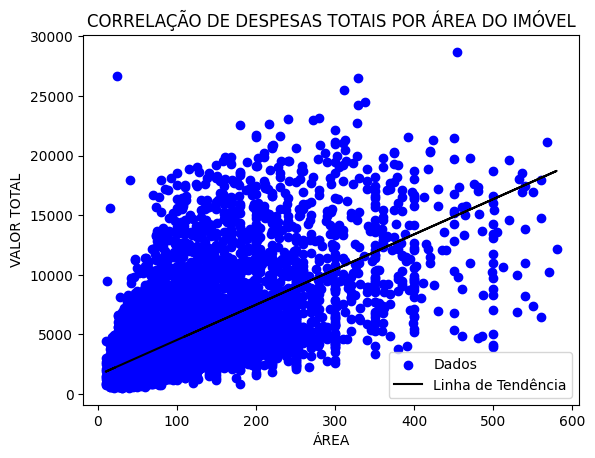

Resultado do coeficiente de correlação: 0.6522723393990336
Valor p: 0.0


In [ ]:
#Regressao Linear

X,y = df['Area'], df['Total']

# Scatter plot
plt.scatter(X, y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('ÁREA')
plt.ylabel('VALOR TOTAL')
plt.title('CORRELAÇÃO DE DESPESAS TOTAIS POR ÁREA DO IMÓVEL')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

In [ ]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df[['Area']]  # Exemplo de variáveis
y = df['Quartos']
z = df['Total']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.3, random_state=42)

# Ajuste o modelo de regressão linear simples
modelo = LinearRegression()
modelo.fit(X_train, y_train, z_train)

# Mostrar quanto a linha de Regressão se ajusta aos dados
print('O coeficiente de determinacao R² é de: {:.2f}'.format(modelo.score(X_test, y_test, z_test)))


O coeficiente de determinacao R² é de: 0.56


In [ ]:
# Definindo as variáveis independentes (X) e a variável dependente (y)
X = df[['Area']]  # Exemplo de variáveis
y = df['Aluguel']
z = df['Total']


# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test, z_train, z_test = train_test_split(X, y, z, test_size=0.3, random_state=42)


# Ajuste o modelo de regressão linear simples
modelo = LinearRegression()
modelo.fit(X_train, y_train, z_train)


# Mostrar quanto a linha de Regressão se ajusta aos dados
print('O coeficiente de determinacao R² é de: {:.2f}'.format(modelo.score(X_test, y_test, z_test)))

O coeficiente de determinacao R² é de: 0.41


Muito similar ao caso anterior, o valor de R² é 0.41. Isso significa que aproximadamente 41% da variabilidade no valor total pode ser explicada pela área.

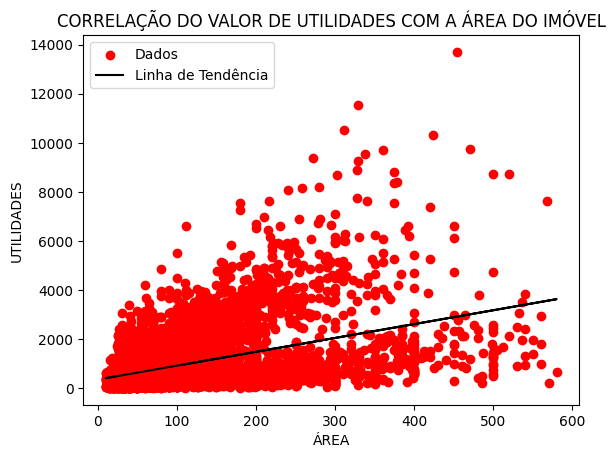

Resultado do coeficiente de correlação: 0.4450279970104867
Valor p: 0.0


In [ ]:
#Regressao Linear

X,y = df['Area'], df['Utilidades']

# Scatter plot
plt.scatter(X, y, color='red', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('ÁREA')
plt.ylabel('UTILIDADES')
plt.title('CORRELAÇÃO DO VALOR DE UTILIDADES COM A ÁREA DO IMÓVEL')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

In [ ]:
# Criar graficos de Dispesao para verificar a Correlação das variáveis:
pairs = [
    ('Area', 'Aluguel'),
    ('Total', 'Aluguel'),
    ('Utilidades', 'Aluguel'),
    ('Area', 'Total'),
    ('Aluguel', 'Total'),
    ('Utilidades', 'Total')
]

# Definir cores para os gráficos
scatter_color = 'blue'
line_color = 'red'

# Função para adicionar linha de regressão
def add_trendline(fig, x, y):
    X = sm.add_constant(df[x])
    model = sm.OLS(df[y], X).fit()
    df['trendline'] = model.predict(X)

    fig.add_trace(
        go.Scatter(
            x=df[x], y=df['trendline'],
            mode='lines', line=dict(color=line_color),
            name='Linha de Tendência'
        )
    )

# Plotar cada par com uma linha de regressão
for x, y in pairs:
    fig = px.scatter(df, x=x, y=y, title=f'Regressão Linear entre {x} e {y}', color_discrete_sequence=[scatter_color])
    add_trendline(fig, x, y)
    fig.update_layout(
        width=1200,  # Definir a largura da figura
        height=500,  # Definir a altura da figura
        xaxis_title=x,
        yaxis_title=y
    )
    fig.show()

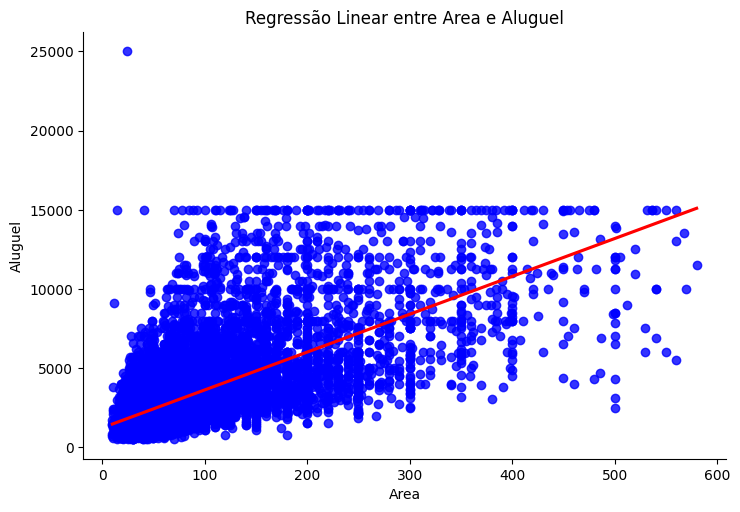

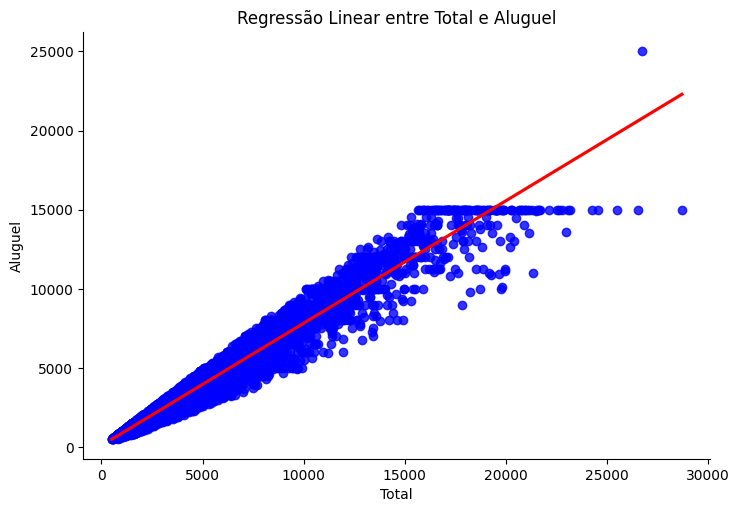

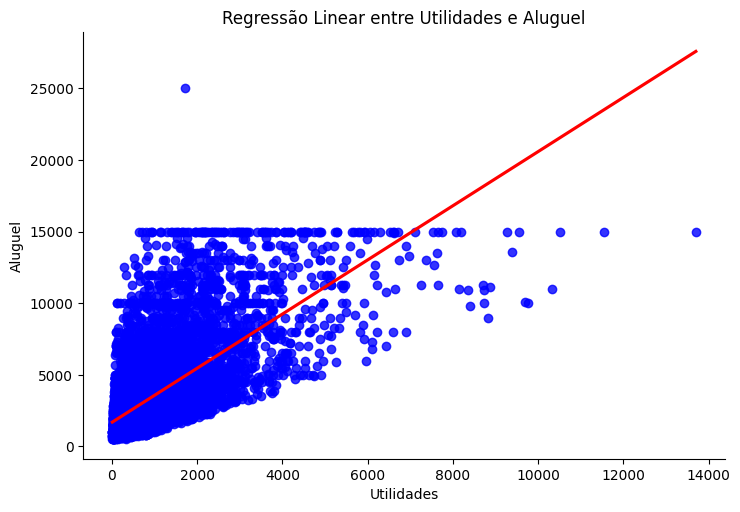

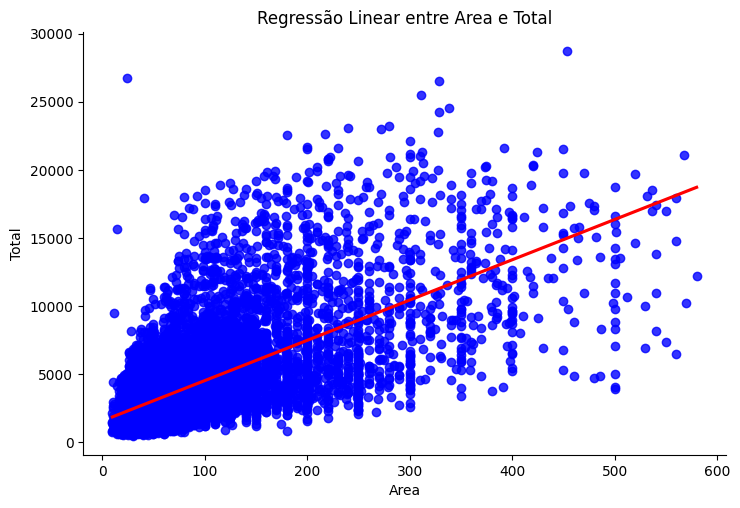

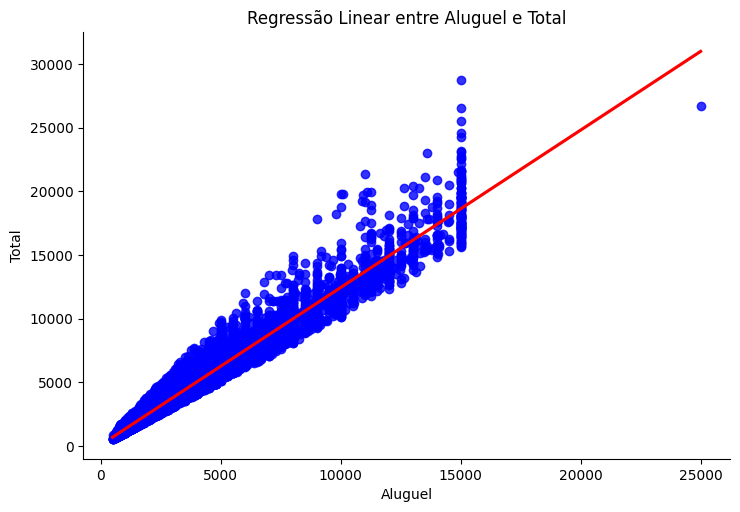

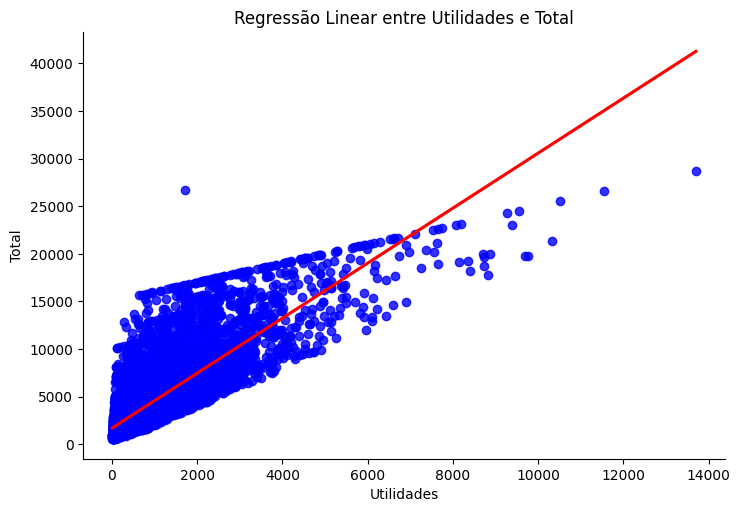

In [ ]:
# Lista de variáveis para Regressão Linear
pairs = [
    ('Area', 'Aluguel'),
    ('Total', 'Aluguel'),
    ('Utilidades', 'Aluguel'),
    ('Area', 'Total'),
    ('Aluguel', 'Total'),
    ('Utilidades', 'Total')
]

# Definir cores para os gráficos
scatter_color = 'blue'
line_color = 'red'

# Plotar cada par com uma linha de regressão
for x, y in pairs:
    sns.lmplot(
        x=x, y=y, data=df, aspect=1.5, ci=None,
        scatter_kws={'color': scatter_color},  # Cor dos pontos de dispersão
        line_kws={'color': line_color}         # Cor da linha de regressão
    )
    plt.title(f'Regressão Linear entre {x} e {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    warnings.filterwarnings('ignore')  # Desativar as mensagens de aviso, erros etc.
    plt.show()

##**<font color = red>Visualização de Dados:**

Criação das visualizações gráficas usando bibliotecas como Matplotlib e Seaborn para representar os dados.



<br>

Para as análises gráficas, foi feita a organização dos dados de acordo com o tipo de imóvel e a quantidade. Sendo esta, primordial para o melhor entendimento do estudo.

</br>

<br>
Abaixo, tem-se o gráfico de distribuição dos tipos de imóveis:
</br>

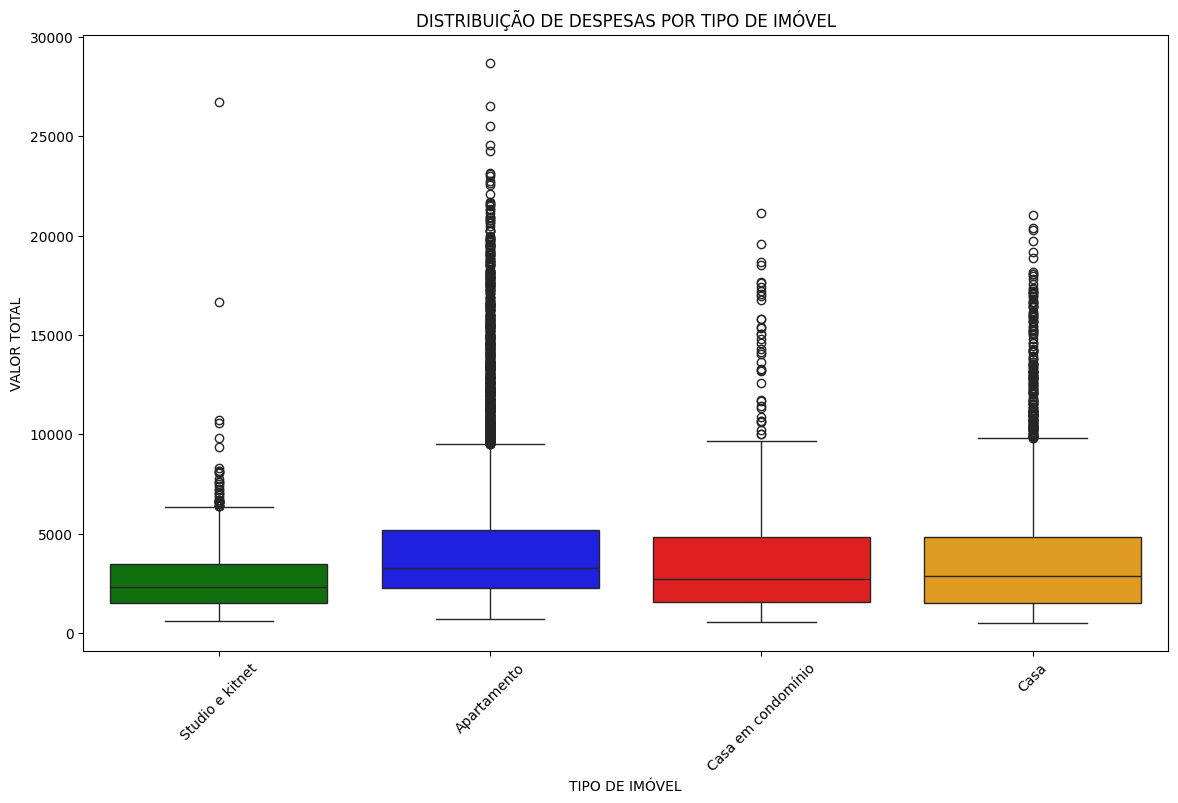

In [ ]:
#Grafico de Distribuicao
X = df['Tipo_do_Imovel']
y = df['Total']
palette = ['green', 'blue', 'red', 'orange']

# Crie o gráfico com a paleta de cores personalizada
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Tipo_do_Imovel', y='Total', palette=palette, hue='Tipo_do_Imovel', legend=False)
plt.title('DISTRIBUIÇÃO DE DESPESAS POR TIPO DE IMÓVEL')
plt.xlabel('TIPO DE IMÓVEL')
plt.ylabel('VALOR TOTAL')
plt.xticks(rotation=45)
plt.show()

<br>



A partir do gráfico acima, foi possível observar que a **maior quantidade está concentrada em imóveis do tipo apartamento.**
</br>

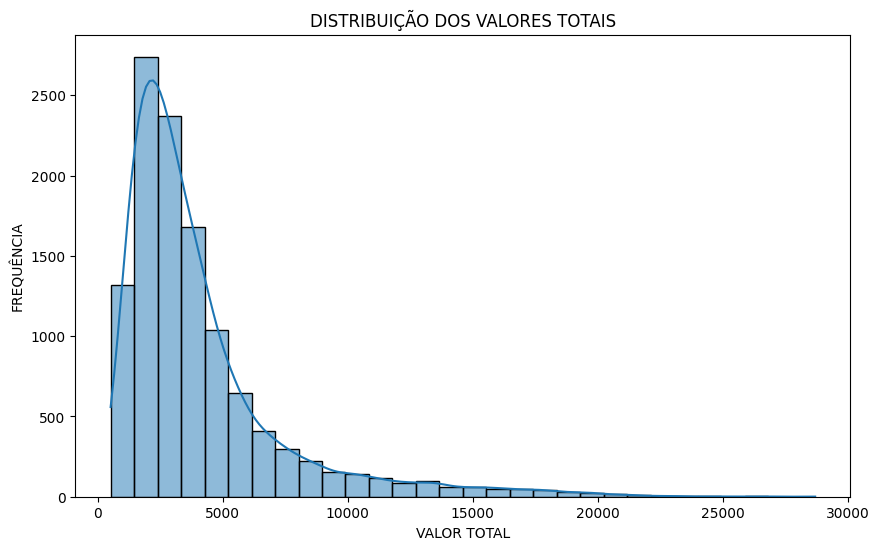

In [ ]:
# Visualizar a distribuição das despesas
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True)
plt.title('DISTRIBUIÇÃO DOS VALORES TOTAIS')
plt.xlabel('VALOR TOTAL')
plt.ylabel('FREQUÊNCIA')
plt.show()

Para obteção dos resultados em termos de porcentagem, foi feita a conversão dos dados e a sua exibição em gráfico de pizza, com a legenda em exibição à direita. Também foi trazida uma segunda demonstração, sendo esta com a descrição dos tipos de imóvel na própria área do gráfico.

In [ ]:
# Grafico de Pizza com os Dados obtidos acima
labels = ['APARTAMENTO', 'CASA', 'STUDIO E KITNET', 'CASA EM CONDOMINIO']
values = [61.71, 24.37, 11.84, 2.06]
colors = ['blue','orange', 'green', 'red']
# Criando o gráfico de pizza
fig = go.Figure(data=[go.Pie(labels=labels, values=values, marker_colors=colors)])
fig.update_traces(textinfo='percent')
fig.update_layout(title='DISTRIBUICAO PERCENTUAL DE TIPO DE IMÓVEL')

# Mostrando o gráfico
fig.show()


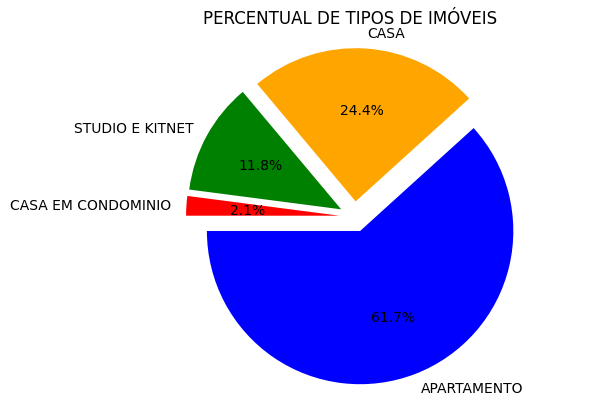

In [ ]:
# Grafico de Pizza com os Dados obtidos através do cálculo de porcentagem de imóveis por tipo
labels = ['APARTAMENTO', 'CASA', 'STUDIO E KITNET', 'CASA EM CONDOMINIO']
values = [61.71, 24.37, 11.84, 2.06]
colors = ['blue','orange', 'green', 'red']

# Criando o gráfico de pizza
fig, ax = plt.subplots()
explode = (0.1, 0.1, 0.1, 0.1)
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=180, colors=colors)
ax.axis('equal')
ax.set_title('PERCENTUAL DE TIPOS DE IMÓVEIS')

#mostrar o gráfico
plt.show()

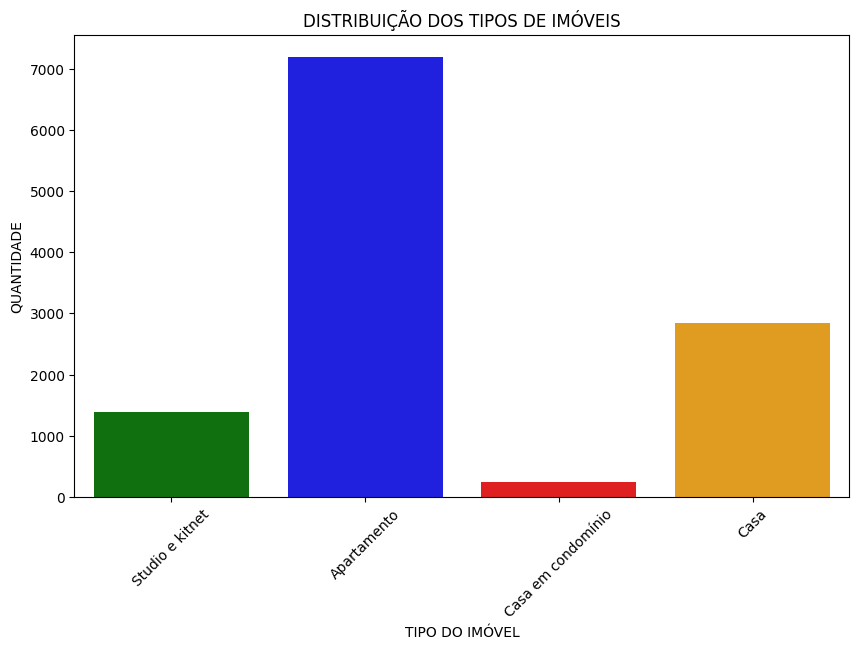

In [ ]:
# Mapeando as cores aos tipos de imóvel na mesma ordem
unique_types = df['Tipo_do_Imovel'].unique()
palette = ['green', 'blue', 'red', 'orange']

# Crie o gráfico com a paleta de cores personalizada
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Tipo_do_Imovel', palette=palette, hue='Tipo_do_Imovel', legend=False)
plt.title('DISTRIBUIÇÃO DOS TIPOS DE IMÓVEIS')
plt.xlabel('TIPO DO IMÓVEL')
plt.ylabel('QUANTIDADE')
plt.xticks(rotation=45)
plt.show()

Abaixo tem-se o histograma do valor de utilidades por quantidade de imóveis.

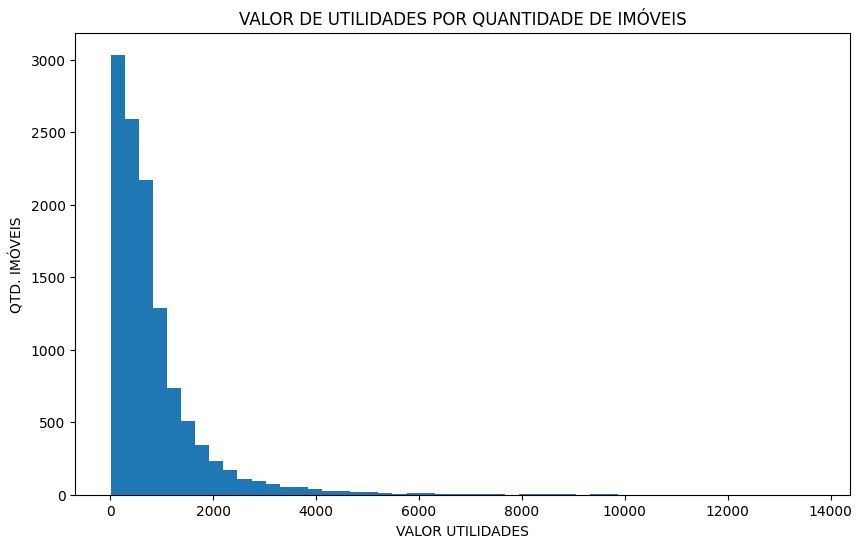

In [ ]:
#Histograma

plt.figure(figsize=(10, 6))
plt.hist(df['Utilidades'], bins=50)
plt.title('VALOR DE UTILIDADES POR QUANTIDADE DE IMÓVEIS')
plt.xlabel('VALOR UTILIDADES')
plt.ylabel('QTD. IMÓVEIS')
plt.show()

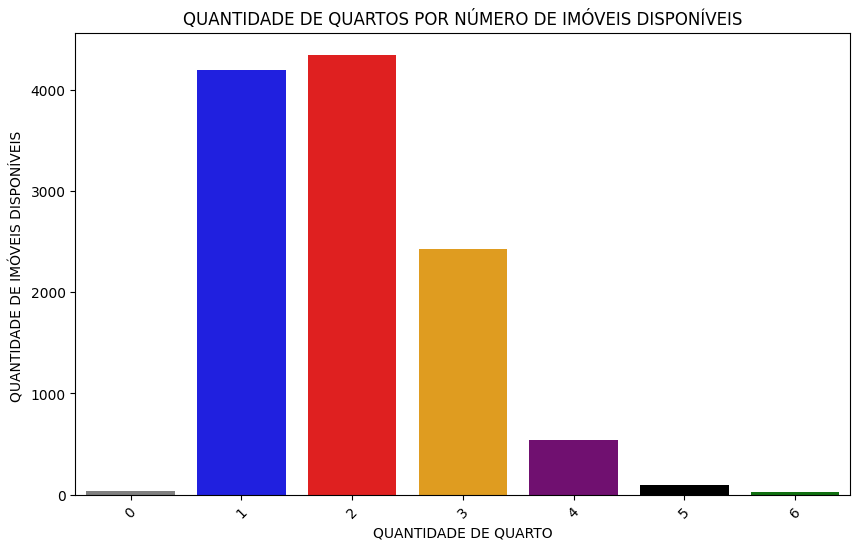

In [ ]:
#Grafico de barras para análise de qtd. de quartos disponiveis por qtd. de imóveis
unique_types = df['Quartos'].unique()
palette = ['gray', 'blue', 'red', 'orange', 'purple', 'black', 'green']

# Crie o gráfico com a paleta de cores personalizada
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Quartos', palette=palette, hue='Quartos', legend=False)
plt.title('QUANTIDADE DE QUARTOS POR NÚMERO DE IMÓVEIS DISPONÍVEIS')
plt.xlabel('QUANTIDADE DE QUARTO')
plt.ylabel('QUANTIDADE DE IMÓVEIS DISPONÍVEIS ')
plt.xticks(rotation=45)
plt.show()

Em resumo, os valores positivos  obtidos abaixo, indicam que as variáveis analisadas tendem a aumentar juntas. Ou seja, existe uma covariancia possitiva entre as variáveis analisadas.

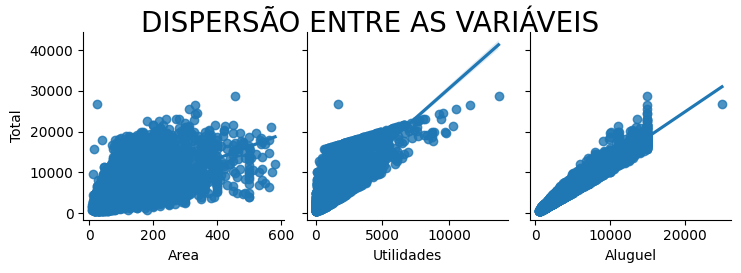

In [ ]:
#Graficos de dispersão entre as variáveis

ax = sns.pairplot(df, y_vars='Total', x_vars=['Area', 'Utilidades', 'Aluguel'], kind='reg')
ax.fig.suptitle('DISPERSÃO ENTRE AS VARIÁVEIS', fontsize=20, y=1.05)
plt.show()

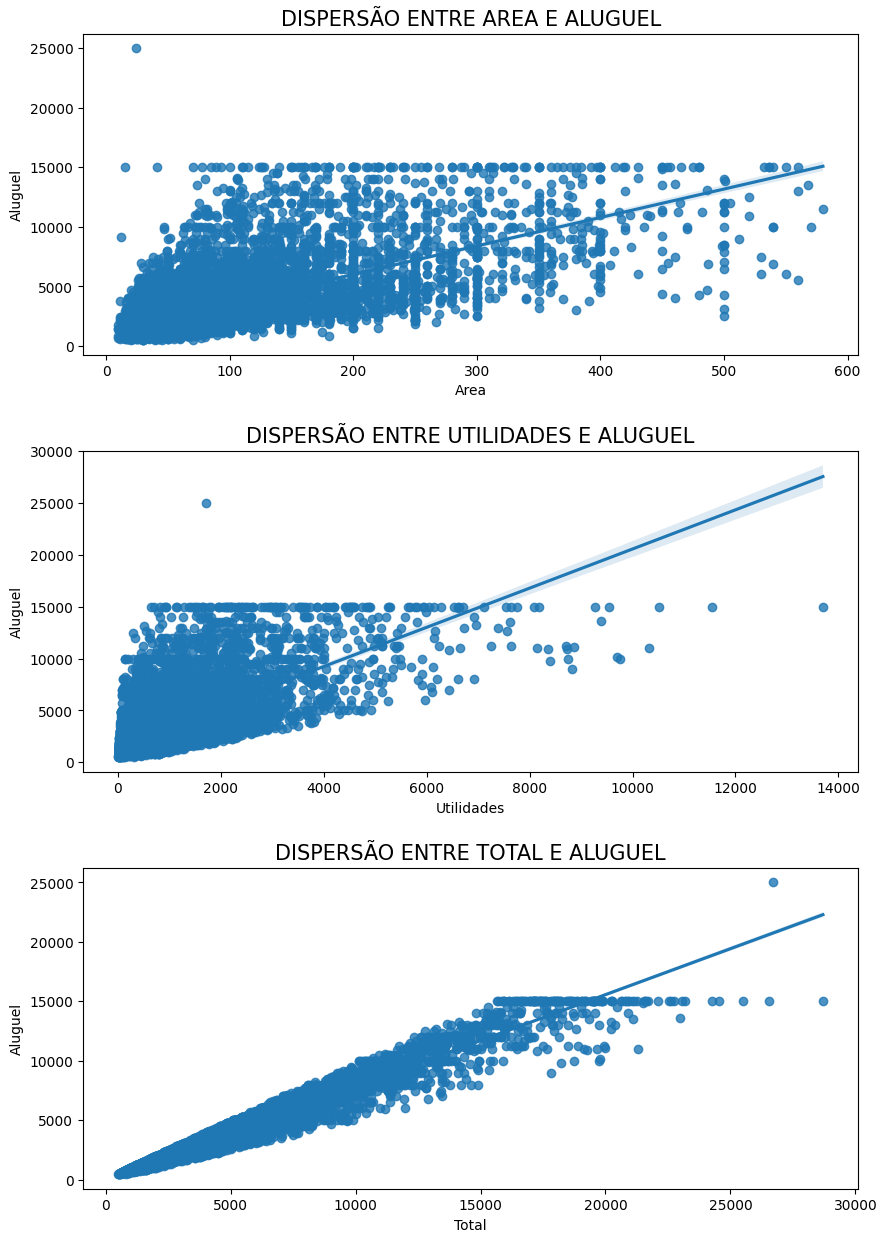

In [ ]:
#Gráficos de dispersão entre as variáveis

x_vars = ['Area', 'Utilidades', 'Total']
y_var = 'Aluguel'

# Crie subplots com o número de linhas igual ao número de variáveis x
fig, axes = plt.subplots(nrows=len(x_vars), ncols=1, figsize=(10, 5 * len(x_vars)))

# Ajuste o espaço entre os subplots
fig.subplots_adjust(hspace=0.3)

# Itere sobre as variáveis e crie gráficos de dispersão com linha de regressão
for i, x_var in enumerate(x_vars):
    sns.regplot(x=x_var, y=y_var, data=df, ax=axes[i])
    axes[i].set_title(f'DISPERSÃO ENTRE {x_var.upper()} E {y_var.upper()}', fontsize=15)


# Mostrar o gráfico
plt.show()

##**<font color = red>Conclusões:**


Diante da análise de regressão linear realizada, observou-se que a variável
R² é igual a 0,44. Isso indica que 44% da variabilidade no valor do aluguel pode ser explicada pela área do imóvel. Portanto, é possível afirmar que esta variável auxilia na previsão do aluguel, uma vez que, dependendo do tamanho do imóvel, o valor do aluguel sofre alterações.

Além disso, foi possível observar que diversas variáveis influenciam os valores dos aluguéis. As variáveis mais relevantes para prever o valor do aluguel são a quantidade de garagens, a área, o valor total do aluguel e a quantidade de quartos. As variáveis que tendem a aumentar o valor do aluguel são a área, a quantidade de quartos e a quantidade de garagens. Por outro lado, a variável que pode reduzir o valor é o valor total do aluguel. Ao comparar o valor do aluguel com o valor total do aluguel e a área, o R² resultou em 0,41, ou seja, 41%.

O gráfico de distribuição de despesas evidencia isso claramente, ao mostrar que imóveis do tipo apartamento, casa em condomínio e casa estão entre os de maior valor.

Na análise de predição do aluguel, utilizou-se como base um imóvel com área de 60m² e obtive-se o resultado de R$ 2.656,19.


Em resumo, para aprimorar a análise, é recomendável realizar uma segmentação por regiões, o que proporcionaria uma compreensão mais detalhada dos dados. Especificar claramente o que representa a coluna 'Total' também é fundamental para evitar ambiguidades. Além disso, a inclusão dos valores das despesas por região adicionaria uma camada de profundidade à análise financeira. Por fim, incorporar variáveis adicionais como proximidade de hospitais, shoppings, mercados, escolas, faculdades e meios de transporte pode fornecer insights valiosos, contribuindo para uma análise mais robusta e informada.